#### 1.

In [2]:
library('fGarch')

Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics


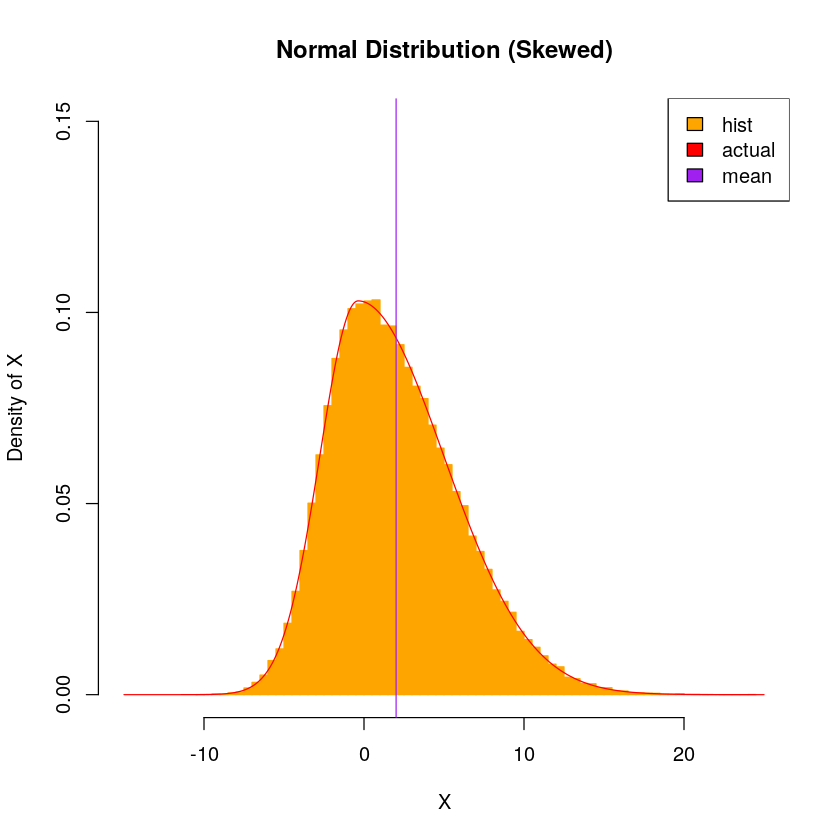

In [3]:
N = 100000
mu = 2
sigma = 4
realVar = sigma ** 2
spread = 1.5

histVals = rsnorm(N, mu, sigma, spread)
x = seq(-15, 25, 0.1)

hist(histVals, breaks=50, freq=FALSE, xlim=range(-15, 25), col="orange", ylim=c(0, 0.15), xlab="X", ylab="Density of X", border='orange', main="Normal Distribution (Skewed)")
lines(x, dsnorm(x, 2, 4, 1.5), col="red")
abline(v=mean(histVals), col="purple")
legend("topright", c("hist", "actual","mean"), fill=c("orange", "red", "purple"))

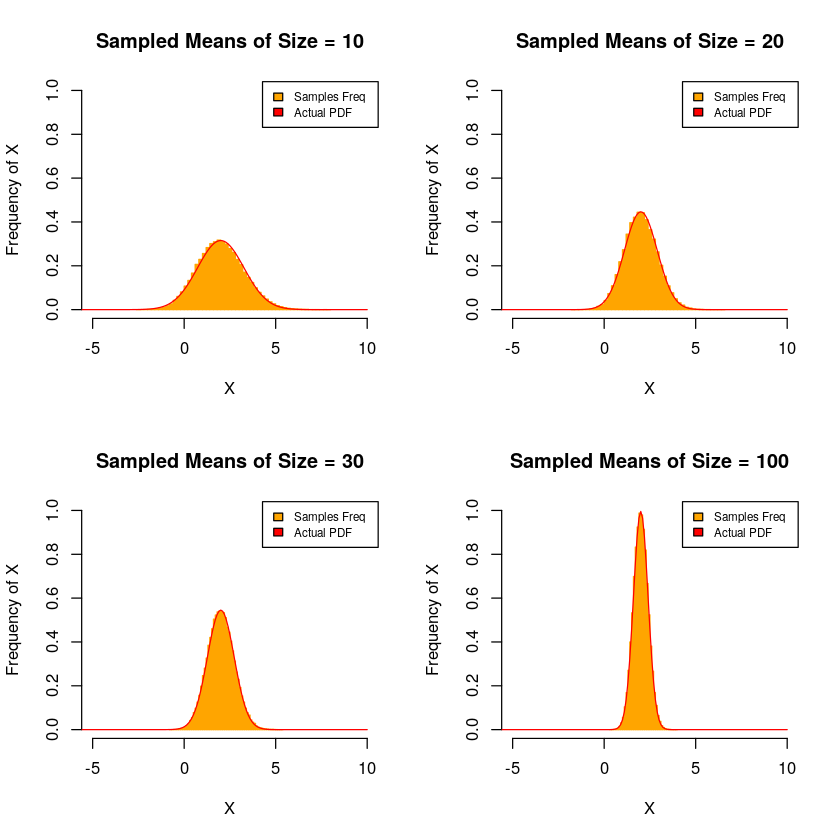

In [35]:
normSample = function(n) {
    means = c(length=N)
    for (i in 1:N) {
        vals = rsnorm(n, 2, 4, 1.5)
        mean = mean(vals)
        means[i] = mean
    }
    return(means)
}

par(mfrow = c(2, 2))
sampSizes = c(10, 20, 30, 100)
x = seq(-10, 10, 0.1)

for (sampSize in sampSizes) {
    samp = normSample(sampSize)
    std = stdev(samp)
    mean = mean(samp)
    hist(samp, breaks=50, freq=FALSE, col='orange', ylim=c(0, 1), xlim=c(-5, 10), xlab='X', ylab='Frequency of X', 
         main=sprintf("Sampled Means of Size = %d", sampSize), border='orange')
    lines(x, dnorm(x, mean, std), col='red')
    legend("topright", c("Samples Freq", "Actual PDF"), fill=c("orange", "red"), cex=0.7)
}

The CLT is almost near perfect in matching the sampling distributions. It also illustrates that as n gets larger and larger, the distribution itself approaches a vertical line centered on the actual population mean.

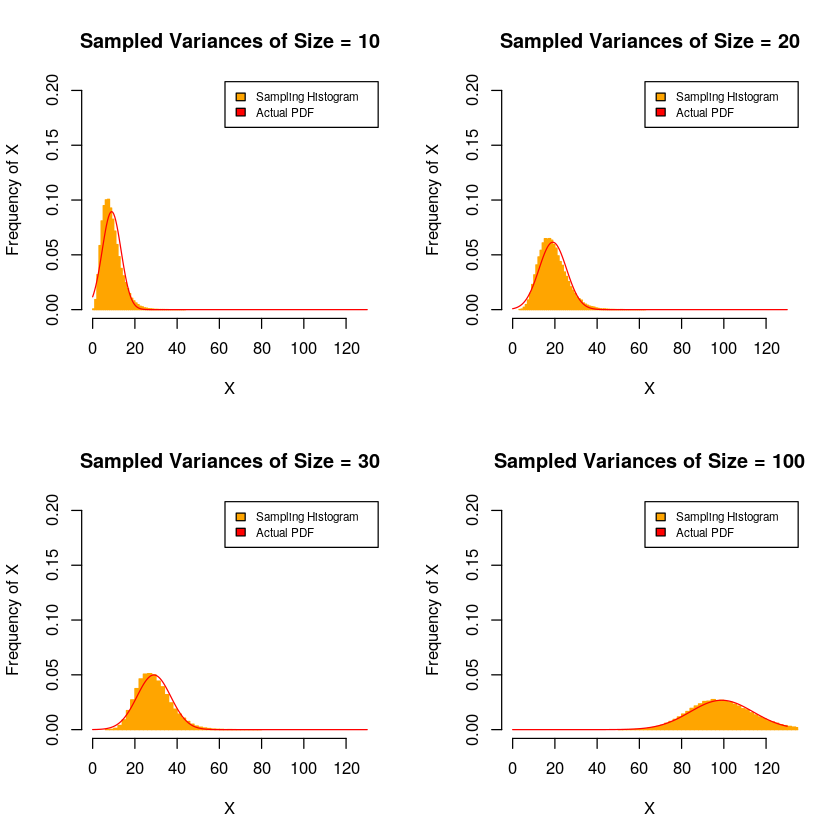

In [36]:
normVarSample = function(n) {
    vars = c(length=N)
    for (i in 1:N) {
        sampVars = rsnorm(n, 2, 4, 1.5)
        var = ((n - 1) * var(sampVars)) / realVar
        vars[i] = var
    }
    return(vars)
}

par(mfrow = c(2, 2))
sampSizes = c(10, 20, 30, 100)
xVals = seq(0, 130, 0.5)

for (sampSize in sampSizes) {
    samp = normVarSample(sampSize)
    std = stdev(samp)
    mean = mean(samp)
    hist(samp, breaks=50, freq=FALSE, col='orange', ylim=c(0, 0.2), xlim=c(0, 130), xlab='X', ylab='Frequency of X', 
         main=sprintf("Sampled Variances of Size = %d", sampSize), border='orange')
    lines(xVals, dnorm(xVals, mean, std), col='red')
    legend("topright", c("Sampling Histogram", "Actual PDF"), fill=c("orange", "red"), cex=0.7)
}

Similar to before, as the PDF matches the sample very well, and seems to only match better as the sample size grows